Import all the modules that I need

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import requests

# Question 1.
Using the farmers’ markets dataset from lecture (farmers-mkts.csv) find how many markets sell both wine and cheese. How many sell plants and nuts? How many sell poultry and eggs? How many sell honey and flowers? Create a function that reports the proportion of all farmers markets in the United States that sell these pairs.

In [ ]:
#read the csv file
df = pd.read_csv("https://raw.githubusercontent.com/danhammer/envirods/main/data/farmers-mkts.csv")

In [ ]:
#attributes
attributes = [
    'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Bakedgoods', 'Cheese', 'Crafts',
    'Flowers', 'Eggs', 'Seafood', 'Herbs', 'Vegetables', 'Honey', 'Jams',
    'Maple', 'Meat', 'Nursery', 'Nuts', 'Plants', 'Poultry', 'Prepared',
    'Soap', 'Trees', 'Wine'
]
products = df[attributes]
products=products.dropna()
products

,Credit,WIC,WICcash,SFMNP,SNAP,Bakedgoods,Cheese,Crafts,Flowers,Eggs,...,Maple,Meat,Nursery,Nuts,Plants,Poultry,Prepared,Soap,Trees,Wine
0,Y,N,N,N,N,Y,Y,N,Y,Y,...,N,N,N,N,N,N,Y,Y,N,Y
1,Y,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
2,N,Y,N,Y,Y,Y,Y,Y,Y,Y,...,Y,Y,N,Y,Y,Y,Y,Y,N,N
3,N,N,Y,Y,Y,Y,N,Y,Y,N,...,N,N,N,Y,N,N,Y,Y,N,N
4,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7859,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
7860,N,N,N,N,N,Y,N,N,Y,Y,...,Y,N,Y,N,Y,Y,Y,Y,N,N
7861,Y,N,N,N,N,Y,Y,N,Y,Y,...,N,N,Y,Y,Y,N,Y,Y,N,N
7862,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N


#### A function that reports the number of farmers markets which sells both products





In [ ]:
def sell(product1):
  total = products[(products[product1[0]]=="Y") & (products[product1[1]]=="Y")]
  print(f"{len(total)} markets sell both {product1[0]} and {product1[1]}")

In [ ]:
sell(["Wine","Cheese"])
sell(["Plants","Nuts"])
sell(["Poultry","Eggs"])
sell(["Honey","Flowers"])

449 markets sell both Wine and Cheese
1109 markets sell both Plants and Nuts
1409 markets sell both Poultry and Eggs
2602 markets sell both Honey and Flowers


#### A function that reports the proportion of all farmers markets in the United States that sell these pairs

In [ ]:
def proportion(product1):
  total = products[(products[product1[0]]=="Y") & (products[product1[1]]=="Y")]
  print(f"Farmers markets that sells both products covers {round(len(total)/len(products),3)} proportion of all farmers markets.")

In [ ]:
proportion(["Wine","Cheese"])
proportion(["Plants","Nuts"])
proportion(["Poultry","Eggs"])
proportion(["Honey","Flowers"])

Farmers markets that sells both products covers 0.057 proportion of all farmers markets.
Farmers markets that sells both products covers 0.141 proportion of all farmers markets.
Farmers markets that sells both products covers 0.179 proportion of all farmers markets.
Farmers markets that sells both products covers 0.331 proportion of all farmers markets.


# Question 2.
Using the world dataset from lecture (located at geopandas.datasets.get_path('naturalearth_lowres')), calculate the total population by region in the world. Create a horizontal bar chart that displays the total population by region.

In [ ]:
#get the data
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [ ]:
#Group by continent and add all the numbers
population=world.groupby("continent").sum()
population

,pop_est,gdp_md_est
continent,,
Africa,1219176238,6025295.50
Antarctica,4050,810.00
Asia,4389144868,55434607.77
Europe,746398461,25284877.00
North America,573042112,23505137.00
Oceania,36782844,1412885.00
Seven seas (open ocean),140,16.00
South America,418540749,6377091.80


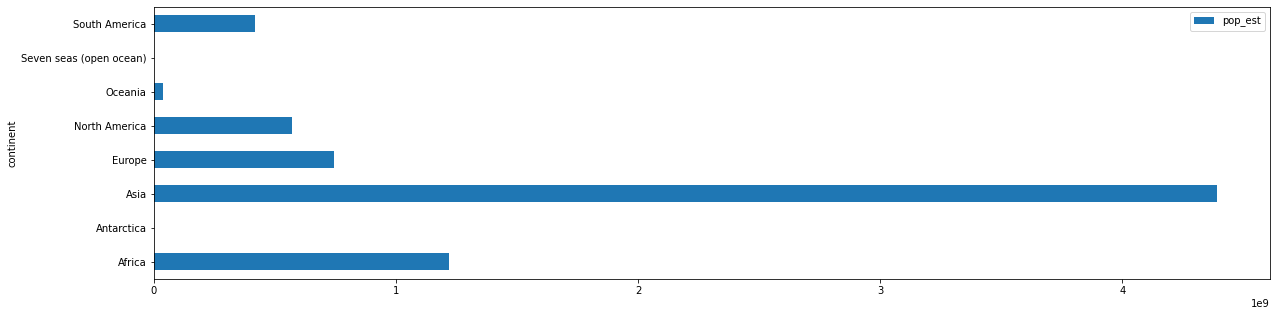

In [ ]:
#Make a horizontal bar chart which displays the total population by region
population.plot.barh(y='pop_est',figsize=(20,5))

#### Since the population of 'Seven seas' and 'Antarctica' is so tiny, they don't appear on the chart.



# Question 3.
Using the world dataset from lecture, define a variable for gross domestic product per capita as world['gdp_per_cap'] = world['gdp_md_est'] / world['pop_est'] and plot a chloropleth map that colors each country in the world by its GDP per capita.

In [ ]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

#A variable for gdp per capita
world["gdp_per_cap"] = world["gdp_md_est"]/world["pop_est"]

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


#### A chlorpleth map that colors each country in the world by its GDP per capita


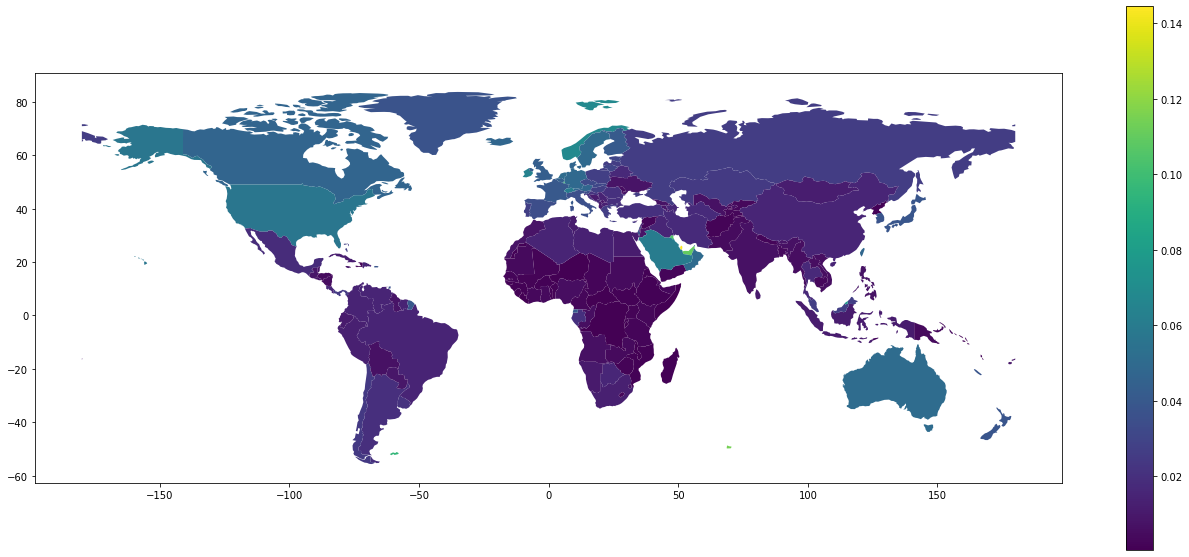

In [ ]:
fig,ax=plt.subplots(figsize=(23,10))
world.plot(ax=ax,column='gdp_per_cap', legend=True)

# Question 4.
Create a map of coal-fired power plants in India that are currently operating, where each point is colored by its annual carbon emissions. Create another map that colors the power plants by some measure of efficiency (like capacity over emissions).

In [ ]:
#Get the data
url = "https://global-coal-map-2020.s3.eu-west-2.amazonaws.com/data/coal2020.geojson"
r = requests.get(url)
response = r.json()
features = response["features"]

In [ ]:
#Get the point(location) of each power plant
data = [f['properties'] for f in features]
coordinate = [x['geometry'] for x in features]
coordinate1 = [x['coordinates'][0] for x in coordinate]
coordinate2 = [x['coordinates'][1] for x in coordinate]

#Make the DataFrame of the point(location) of each power plant
locations_x=pd.DataFrame(coordinate1)
locations_y=pd.DataFrame(coordinate2)

#Make the DataFrame of the whole data 
df = pd.DataFrame(data)

#Merge the location data and whole data
df=df.merge(locations_x,left_index=True, right_index=True,how='left')
df=df.merge(locations_y,left_index=True, right_index=True,how='left')

df

,annualCarbon,capacity,coalType,country,plant,status,Tracker ID,type,retire1,retire2,retire3,start1,start2,year1,year2,startLabel,regionLabel,0_x,0_y
0,30.69,6720.0,Bituminous,China,Datang Tuoketuo power station,Operating,G102182,Subcritical,2100,2100,2100.0,2003,2017,2017,2020,2003 - 2017,China,111.358900,40.195230
1,26.96,6600.0,Unknown,Egypt,Hamarawein IPP coal project,Pre-permit,,Ultra-super,2100,2100,NaN,2100,2100,2020,2020,?,Africa and Middle East,34.199789,26.250199
2,28.40,6400.0,Unknown / Bituminous,South Korea,Taean power station,Operating,G109800,IGCC,2100,2100,2100.0,1995,2017,2017,2020,1995 - 2017,Other Asia,126.234382,36.903934
3,26.69,6040.0,Bituminous,South Korea,Dangjin power station,Operating,G101952,Supercritical,2100,2100,2100.0,1999,2016,2016,2020,1999 - 2016,Other Asia,126.512200,37.055130
4,24.51,6000.0,Unknown,Bangladesh,Phulbari Coal Project (China Gezhouba),Announced,,Ultra-super,2100,2100,NaN,2100,2100,2020,2020,?,Other Asia,89.553196,25.946844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5365,0.18,30.0,Hard coal,Czech Republic,Marianske Hory power station,Operating,G106662,Unknown,2008,2008,2100.0,1970,1970,2000,2007,1970,EU28,18.270000,49.860000
5366,0.17,30.0,Unknown,India,Kandra Steel power station,Operating,G105537,Subcritical,2100,2100,2100.0,2008,2008,2008,2020,2008,India,85.943760,23.018670
5367,0.17,30.0,Unknown,India,Kalinganagar Maithan power station,Operating,G105476,Subcritical,2100,2100,2100.0,2007,2007,2007,2020,2007,India,86.333000,20.850000
5368,0.17,30.0,Unknown,India,JSW Tarapur power station,Operating,G105377,Subcritical,2100,2100,2100.0,2010,2010,2010,2020,2010,India,72.740000,19.950000


In [ ]:
#Get the data of India
india_power = df[df['country']=='India']

#Find the operating power plant
india_power_op = india_power[india_power['status']=='Operating']

In [ ]:
#Create another data which only contains the data of operating power plant
india = geopandas.GeoDataFrame(
    india_power_op, 
    geometry=geopandas.points_from_xy(india_power_op['0_x'], india_power_op['0_y'])
)
india

,annualCarbon,capacity,coalType,country,plant,status,Tracker ID,type,retire1,retire2,retire3,start1,start2,year1,year2,startLabel,regionLabel,0_x,0_y,geometry
19,23.76,4760.0,Bituminous,India,Vindhyachal power station,Operating,G110598,Subcritical,2100,2100,2100.0,1987,2015,2015,2020,1987 - 2015,India,82.671900,24.098300,POINT (82.67190 24.09830)
20,20.46,4620.0,Bituminous,India,Mundra Thermal Power Project (Adani),Operating,G107102,Subcritical,2100,2100,2100.0,2009,2012,2012,2020,2009 - 2012,India,69.553693,22.823543,POINT (69.55369 22.82354)
30,21.64,4260.0,Bituminous,India,Vindhyachal power station,Operating,G110598,Subcritical,2100,2100,2100.0,1987,2013,2013,2014,1987 - 2013,India,82.671900,24.098300,POINT (82.67190 24.09830)
56,16.61,4000.0,Sub-bituminous,India,Tata Mundra Ultra Mega Power Project,Operating,G109982,Supercritical,2100,2100,2100.0,2012,2013,2013,2020,2012 - 2013,India,69.528100,22.815800,POINT (69.52810 22.81580)
67,16.45,3960.0,Unknown,India,Sasan Ultra Mega Power Project,Operating,G108831,Supercritical,2100,2100,2100.0,2013,2015,2015,2020,2013 - 2015,India,82.626470,23.977520,POINT (82.62647 23.97752)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,0.17,30.0,Unknown,India,Nagpur Sponge Iron power station,Operating,G107188,Subcritical,2100,2100,2100.0,2009,2009,2009,2020,2009,India,79.000000,21.000000,POINT (79.00000 21.00000)
5366,0.17,30.0,Unknown,India,Kandra Steel power station,Operating,G105537,Subcritical,2100,2100,2100.0,2008,2008,2008,2020,2008,India,85.943760,23.018670,POINT (85.94376 23.01867)
5367,0.17,30.0,Unknown,India,Kalinganagar Maithan power station,Operating,G105476,Subcritical,2100,2100,2100.0,2007,2007,2007,2020,2007,India,86.333000,20.850000,POINT (86.33300 20.85000)
5368,0.17,30.0,Unknown,India,JSW Tarapur power station,Operating,G105377,Subcritical,2100,2100,2100.0,2010,2010,2010,2020,2010,India,72.740000,19.950000,POINT (72.74000 19.95000)


### A map of coal-fired power plants in India that are currently operating

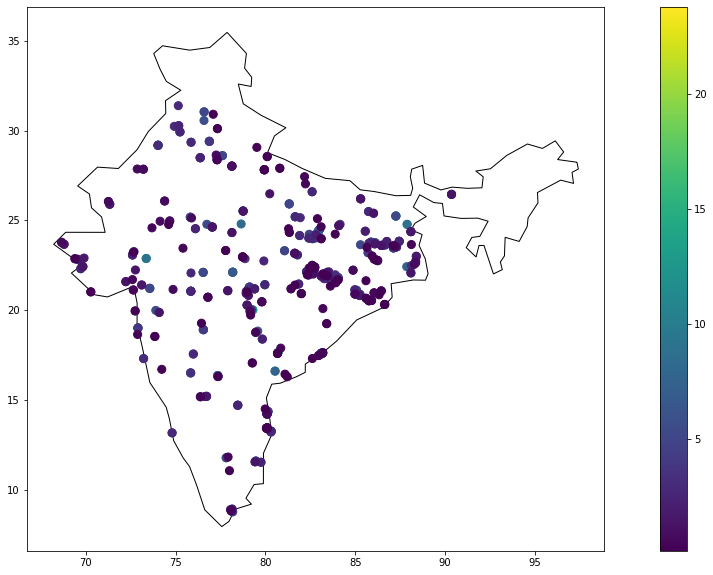

In [ ]:
#Plot the data

fig,ax=plt.subplots(figsize=(20,10))

world[world["name"]=="India"].plot(ax=ax, edgecolor='black',color="white",legend=True)
india.plot(ax=ax, column='annualCarbon', legend=True, markersize=65)

I created a map of coal-fired power plants in India that are currently operating and colored each dot by its annual carbon emissions. To color the individual dot by its annual carbon emissions, I set the column as 'annualCarbon'.

### A map that colors the power plants by some measure of efficiency

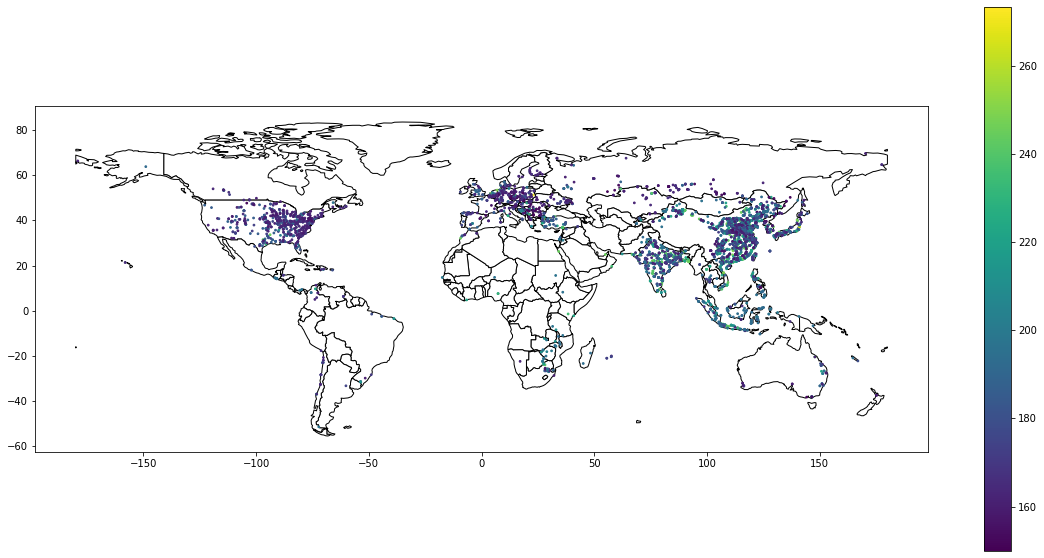

In [32]:
#Get efficeincy
df["efficiency"] = df["capacity"]/df["annualCarbon"]

df = geopandas.GeoDataFrame(
    df, 
    geometry=geopandas.points_from_xy(df['0_x'], df['0_y'])
)

fig,world_ax=plt.subplots(figsize=(20,10))

world.plot(ax=world_ax, edgecolor='black',color="white",legend=True)
df.plot(ax=world_ax,column='efficiency',legend=True, markersize=3)

Also, I create another map that colors the power plants by efficiency which is capacity over annual carbon emission, and I color each dot by its efficiency.

# Question 5.
Use the Earthrise news API to plot a map of 1,000 local news stories about wildlands. Use this URL as a reference: https://api.e7e.dev/news/retrieve?themes=wildlands&limit=2000&daysback=365 but change the parameters. Where are most of the stories located? Why are there areas with very few stories?

In [ ]:
#Get Data
r2=requests.get("https://api.e7e.dev/news/retrieve?themes=wildlands&limit=1000&daysback=365")
res = r2.json()

In [ ]:
#Make wildland dataframe
wildland = pd.DataFrame(res)

#Get the x and y points and make them into dataframe
lation1= [x['Latlon'][0] for x in res]
lation2= [x['Latlon'][1] for x in res]

x=pd.DataFrame(lation1)
y=pd.DataFrame(lation2)

#merge x and y dataframe to wildland dataframe
wildland = wildland.merge(x,left_index=True, right_index=True,how='left')
wildland = wildland.merge(y,left_index=True, right_index=True,how='left')

"""
coord_list=[i["Latlon"] for i in response]
Another way : md_df=pandas.DataFrame(data=={"x":lation1,"y":lation2})
"""

'\ncoord_list=[i["Latlon"] for i in response]\nAnother way : md_df=pandas.DataFrame(data=={"x":lation1,"y":lation2})\n'

In [ ]:
#Create a GeoDataFrame
map = geopandas.GeoDataFrame(
    wildland, 
    geometry=geopandas.points_from_xy(wildland['0_y'], wildland['0_x']) #latlon = latitude, longtitude, x좌표 y좌표 바뀜
)

map

,Title,Source url,Location,Latlon,Themes,Full record,0_x,0_y,geometry
0,Student uses prism traps across Halifax to res...,https://www.cbc.ca/news/canada/nova-scotia/unb...,"Halifax, NS, Canada","[44.648618, -63.5859487]","{'climate crisis': 0.29860178, 'conflict': 0.0...",https://api.e7e.dev/news/retrieve-story?idx=7f...,44.648618,-63.585949,POINT (-63.58595 44.64862)
1,Student uses prism traps across Halifax to res...,https://www.cbc.ca/news/canada/nova-scotia/stu...,"Halifax, NS, Canada","[44.648618, -63.5859487]","{'climate crisis': 0.29860178, 'conflict': 0.0...",https://api.e7e.dev/news/retrieve-story?idx=98...,44.648618,-63.585949,POINT (-63.58595 44.64862)
2,Canada's great expanse of boreal forest is cha...,https://www.cbc.ca/news/canada/edmonton/boreal...,"Saskatoon, SK, Canada","[52.131802, -106.660767]","{'climate crisis': 0.96919584, 'conflict': 0.0...",https://api.e7e.dev/news/retrieve-story?idx=91...,52.131802,-106.660767,POINT (-106.66077 52.13180)
3,Science over snitching? With monarchs in dange...,https://www.cbc.ca/news/canada/london/ontario-...,"London, ON, Canada","[42.9832406, -81.243372]","{'climate crisis': 0.43539286, 'conflict': 0.0...",https://api.e7e.dev/news/retrieve-story?idx=9e...,42.983241,-81.243372,POINT (-81.24337 42.98324)
4,Karnataka plans to de-notify large tracts of f...,https://scroll.in/article/1029349/karnataka-pl...,"Karnataka, India","[14.5203896, 75.7223521]","{'climate crisis': 0.84046197, 'conflict': 0.0...",https://api.e7e.dev/news/retrieve-story?idx=51...,14.520390,75.722352,POINT (75.72235 14.52039)
...,...,...,...,...,...,...,...,...,...
995,Refuge manager receives national award,https://www.paducahsun.com/news/refuge-manager...,"Arkansas, KY, United States","[37.5828763, -82.7323805]","{'climate crisis': 0.14143132, 'conflict': 0.0...",https://api.e7e.dev/news/retrieve-story?idx=77...,37.582876,-82.732381,POINT (-82.73238 37.58288)
996,"American Prairie opens 9,300 acres of new Muss...",https://missoulian.com/news/state-and-regional...,"Phillips County, Montana, United States","[47.8225011, -107.5126045]","{'climate crisis': 0.1699372, 'conflict': 0.00...",https://api.e7e.dev/news/retrieve-story?idx=a8...,47.822501,-107.512604,POINT (-107.51260 47.82250)
997,Seasonal lobstering closures reinstated for Oc...,https://www.nhpr.org/2022-07-13/seasonal-lobst...,"Maine, United States","[45.709097, -68.8590201]","{'climate crisis': 0.17228135, 'conflict': 0.0...",https://api.e7e.dev/news/retrieve-story?idx=f7...,45.709097,-68.859020,POINT (-68.85902 45.70910)
998,Buzzing that brings good,https://www.thestar.com.my/metro/metro-news/20...,"Bayan Lepas, Penang, Malaysia","[5.2948137, 100.2595968]","{'climate crisis': 0.33911243, 'conflict': 0.0...",https://api.e7e.dev/news/retrieve-story?idx=24...,5.294814,100.259597,POINT (100.25960 5.29481)


#### A map that colors the location of stories

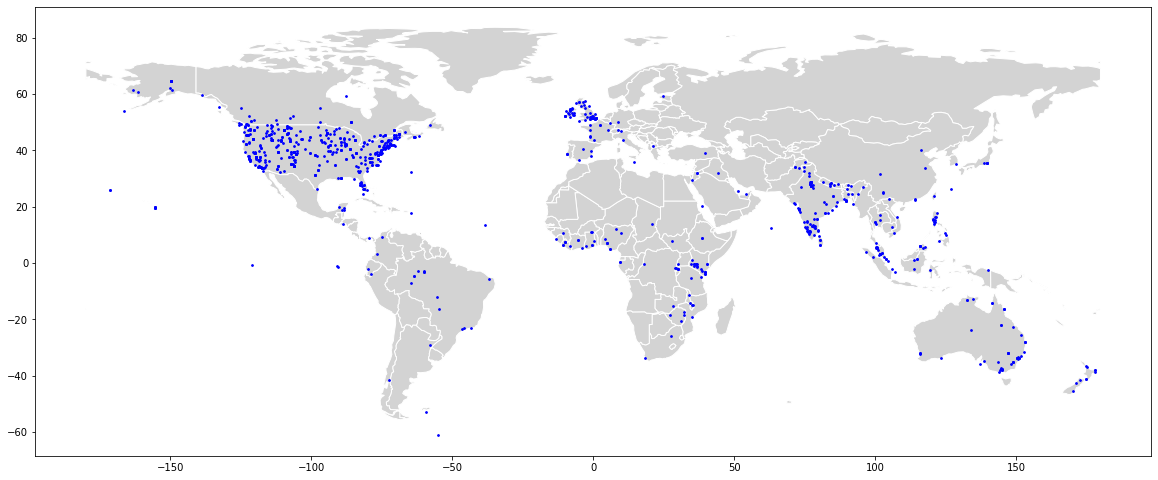

In [ ]:
#Create a map
fig,map_ax=plt.subplots(figsize=(20,10))

world.plot(ax=map_ax,edgecolor='white',color="lightgrey",legend=True)
map.plot(ax=map_ax,markersize=3, color="blue")

#### Most of the stories are located in the United States. Some areas have very few stories because they might not have wildlands or lack stories. Also, some places are deserts or mountains. So that's why I think there are areas with very few stories.